In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
import re
import numpy as np

In [2]:
#import files
A1101_psm_OK_MSF = pd.read_csv('/home/sara/HLA/OK_MSfragger_filtered/filtered_target_psm_A1101.csv')
A1101_psm_MSB = pd.read_csv('/home/sara/HLA/MSB Concat_and_Filtered/MSB_A1101_filtered.csv')

In [3]:
A1101_psm_OK_MSF.head(15)

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide
0,0,AC20171011_Broad_HLA_A1101_R1_Rep02-3085-RVYDP...,2.05516,0.000171,6.901180e-08,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
1,1,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-121...,1.97562,0.000171,1.151810e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
2,2,AC20171011_Broad_HLA_A1101_R1_Rep01-3121-RVYDP...,1.94197,0.000171,1.430560e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
3,3,AC20171011_Broad_HLA_A1101_R2_Rep02-3055-RVYDP...,1.93092,0.000171,1.536090e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
4,4,AC20171011_Broad_HLA_A1101_R1_Rep02-6653-ISDPT...,1.83280,0.000171,2.889660e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
5,5,AC20171011_Broad_HLA_A1101_R2_Rep01-3102-RVYDP...,1.80707,0.000171,3.410490e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
6,6,YE_20180517_SK_HLA_A1101_3IPs_a50mio_R1_01-122...,1.80214,0.000171,3.520650e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
7,7,AC20171011_Broad_HLA_A1101_R2_Rep01-6623-ISDPT...,1.79232,0.000171,3.750410e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
8,8,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R1_02-125...,1.70673,0.000171,6.508520e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
9,9,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-119...,1.65410,0.000171,9.134280e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR


In [4]:
A1101_psm_MSB.tail(15)

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,modi_peptide,modi_peptide_2
46584,59197,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.227...,0.014095,0.008977,0.200315,L.TIAASLAFK.S,TIAASLAFK,TIAASLAFK
46585,59198,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.591...,0.012727,0.008977,0.201999,G.GTGKTTFVK.R,GTGKTTFVK,GTGKTTFVK
46586,59199,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.228...,0.012278,0.008977,0.202552,S.LDKRVILIFH.C,LDKRVILIFH,LDKRVILIFH
46587,59200,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.656...,0.011725,0.008977,0.203237,K.RISSNPVAK.I,RISSNPVAK,RISSNPVAK
46588,59201,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.539...,0.010605,0.008977,0.204629,T.GTGKSVYVK.D,GTGKSVYVK,GTGKSVYVK
46589,59202,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.809...,0.010363,0.008977,0.204930,I.AAATSVLKT.R,AAATSVLKT,AAATSVLKT
46590,59203,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.157...,0.009821,0.008977,0.205607,L.QAVLLM[15.9949]STDRSGL.L,QAVLLM[15.9949]STDRSGL,QAVLLMSTDRSGL
46591,59204,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.179...,0.004841,0.009135,0.211895,S.LFHPSNVEM.L,LFHPSNVEM,LFHPSNVEM
46592,59205,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.189...,0.004738,0.009135,0.212025,R.AVQEFGLARFK.S,AVQEFGLARFK,AVQEFGLARFK
46593,59206,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.104...,0.004233,0.009135,0.212671,M.PFSAGKR.M,PFSAGKR,PFSAGKR


Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on the psm level)')

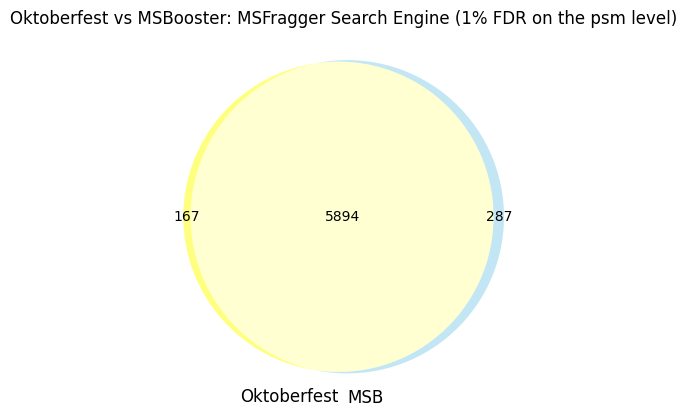

In [5]:
venn2(
      [set(A1101_psm_OK_MSF['modi_peptide'].to_list()), 
       set(A1101_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on the psm level)")

# Stacked bar plot

In [2]:
#SE = pd.read_csv ('/home/sara/Metaproteomics/forKarim/sprot_all/sprot_all_Oktoberfest_MSFragger/msms.txt')
percolator_output_andro = pd.read_csv('/home/sara/Metaproteomics/forKarim/sprot_all/sprot_all_Oktoberfest_MSFragger/results/percolator/original_target.psms', sep= '\t')
percolator_output_prosit = pd.read_csv("/home/sara/Metaproteomics/forKarim/sprot_all/sprot_all_Oktoberfest_MSFragger/results/percolator/rescore_target.psms", sep= '\t')

In [5]:
# the 2nd and 3rd columns will be taken from sprot human and bacteria+human datasets
PO_SH_andro = pd.read_csv('/home/sara/Metaproteomics/forKarim/sprot_human/sprot_human_Oktoberfest_MSFragger/results/percolator/original_target.psms', sep= '\t')
PO_SH_prosit = pd.read_csv('/home/sara/Metaproteomics/forKarim/sprot_human/sprot_human_Oktoberfest_MSFragger/results/percolator/rescore_target.psms', sep= '\t')

PO_SBH_andro = pd.read_csv('/home/sara/Metaproteomics/forKarim/sprot_bacteria_human/sprot_bh_Oktoberfest_MSFragger/results/percolator/original_target.psms', sep= '\t')
PO_SBH_prosit = pd.read_csv('/home/sara/Metaproteomics/forKarim/sprot_bacteria_human/sprot_bh_Oktoberfest_MSFragger/results/percolator/rescore_target.psms', sep= '\t')

In [4]:
percolator_output_andro

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds
0,02406_D04_P026035_B00_A00_R1-18289-VPLQQNFQDNQ...,3.76719,0.000298,7.227510e-09,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK
1,02406_G01_P026014_B00_A00_R1-7983-HYAHVDC[UNIM...,3.73884,0.000298,8.058470e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
2,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,3.62549,0.000298,1.245140e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
3,02406_G01_P026014_B00_A00_R1-18233-VPLQQNFQDNQ...,3.49444,0.000298,2.059190e-08,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK
4,02406_D01_P026011_B00_A00_R1-8106-HYAHVDC[UNIM...,3.45021,0.000298,2.440250e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
...,...,...,...,...,...,...
104550,02406_D01_P026011_B00_A00_R1-4363-GPGERAGGGGDA...,-2.04614,0.734952,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK
104551,02404_F02_P025829_B00_A00_R1-14814-GPGERAGGGGD...,-2.09486,0.734972,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK
104552,02405_C04_P025938_B00_A00_R1-39268-M[UNIMOD:35...,-2.09850,0.734972,1.000000e+00,_.M[UNIMOD:35]LGLGRVFSSAVRPR._,M[UNIMOD:35]LGLGRVFSSAVRPR
104553,02406_F03_P026029_B00_A00_R1-8935-DKSNTSASSTEM...,-2.10234,0.734972,1.000000e+00,_.DKSNTSASSTEMVNK._,DKSNTSASSTEMVNK


In [18]:
#add a new column where you will clean the peptide column in it / leave the original as it is 
percolator_output_andro["modi_peptide"] = percolator_output_andro['peptide']
PO_SH_andro["modi_peptide"] = PO_SH_andro['peptide']
PO_SBH_andro["modi_peptide"] = PO_SBH_andro['peptide']

#rename the dataframe 
cleaned_SA_andro = percolator_output_andro
cleaned_SH_andro = PO_SH_andro
cleaned_SBH_andro = PO_SBH_andro

#clean the modi_peptide column
cleaned_SA_andro['modi_peptide'] = cleaned_SA_andro['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
cleaned_SA_andro['modi_peptide'] = cleaned_SA_andro['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
############################################################
cleaned_SH_andro['modi_peptide'] = cleaned_SH_andro['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
cleaned_SH_andro['modi_peptide'] = cleaned_SH_andro['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
############################################################
cleaned_SBH_andro['modi_peptide'] = cleaned_SBH_andro['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
cleaned_SBH_andro['modi_peptide'] = cleaned_SBH_andro['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
############################################################
cleaned_SA_andro

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide
0,02406_D04_P026035_B00_A00_R1-18289-VPLQQNFQDNQ...,3.76719,0.000298,7.227510e-09,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK,VPLQQNFQDNQFQGK
1,02406_G01_P026014_B00_A00_R1-7983-HYAHVDC[UNIM...,3.73884,0.000298,8.058470e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
2,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,3.62549,0.000298,1.245140e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
3,02406_G01_P026014_B00_A00_R1-18233-VPLQQNFQDNQ...,3.49444,0.000298,2.059190e-08,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK,VPLQQNFQDNQFQGK
4,02406_D01_P026011_B00_A00_R1-8106-HYAHVDC[UNIM...,3.45021,0.000298,2.440250e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
...,...,...,...,...,...,...,...
104550,02406_D01_P026011_B00_A00_R1-4363-GPGERAGGGGDA...,-2.04614,0.734952,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK,GPGERAGGGGDAGK
104551,02404_F02_P025829_B00_A00_R1-14814-GPGERAGGGGD...,-2.09486,0.734972,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK,GPGERAGGGGDAGK
104552,02405_C04_P025938_B00_A00_R1-39268-M[UNIMOD:35...,-2.09850,0.734972,1.000000e+00,_.M[UNIMOD:35]LGLGRVFSSAVRPR._,M[UNIMOD:35]LGLGRVFSSAVRPR,MLGLGRVFSSAVRPR
104553,02406_F03_P026029_B00_A00_R1-8935-DKSNTSASSTEM...,-2.10234,0.734972,1.000000e+00,_.DKSNTSASSTEMVNK._,DKSNTSASSTEMVNK,DKSNTSASSTEMVNK


In [19]:
cleaned_SH_andro

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide
0,02406_D04_P026035_B00_A00_R1-18289-VPLQQNFQDNQ...,4.33864,0.000208,2.140690e-13,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK,VPLQQNFQDNQFQGK
1,02406_G01_P026014_B00_A00_R1-18233-VPLQQNFQDNQ...,4.04980,0.000208,1.294000e-12,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK,VPLQQNFQDNQFQGK
2,02406_D04_P026035_B00_A00_R1-30937-NIETIINTFHQ...,3.98523,0.000208,1.934620e-12,_.NIETIINTFHQYSVK._,NIETIINTFHQYSVK,NIETIINTFHQYSVK
3,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,3.85876,0.000208,4.253380e-12,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK
4,02406_F03_P026029_B00_A00_R1-23109-M[UNIMOD:35...,3.85668,0.000208,4.308690e-12,_.M[UNIMOD:35]AVGFM[UNIMOD:35]LAHPYGFTR._,M[UNIMOD:35]AVGFM[UNIMOD:35]LAHPYGFTR,MAVGFMLAHPYGFTR
...,...,...,...,...,...,...,...
88755,02406_F03_P026029_B00_A00_R1-17143-KYGEVEEVEIL...,-1.81700,0.855031,9.924880e-01,_.KYGEVEEVEILYNPK._,KYGEVEEVEILYNPK,KYGEVEEVEILYNPK
88756,02405_C04_P025938_B00_A00_R1-17669-GPGERAGGGGD...,-1.82356,0.855031,9.924880e-01,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK,GPGERAGGGGDAGK
88757,02405_C04_P025938_B00_A00_R1-22429-AVPSSPAGSAA...,-1.84143,0.855033,9.924880e-01,_.AVPSSPAGSAARGR._,AVPSSPAGSAARGR,AVPSSPAGSAARGR
88758,02406_D04_P026035_B00_A00_R1-16914-GPGERAGGGGD...,-1.86583,0.855047,9.924880e-01,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK,GPGERAGGGGDAGK


In [20]:
cleaned_SBH_andro

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide
0,02406_G01_P026014_B00_A00_R1-7983-HYAHVDC[UNIM...,3.53549,0.000261,5.505530e-12,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
1,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,3.36591,0.000261,1.693590e-11,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
2,02406_D01_P026011_B00_A00_R1-8106-HYAHVDC[UNIM...,3.26585,0.000261,3.286620e-11,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
3,02406_F03_P026029_B00_A00_R1-16850-GITISTAHVEY...,3.11908,0.000261,8.691710e-11,_.GITISTAHVEYETEK._,GITISTAHVEYETEK,GITISTAHVEYETEK
4,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,3.11131,0.000261,9.151450e-11,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
...,...,...,...,...,...,...,...
96034,02404_F02_P025829_B00_A00_R1-28967-LSALAALPVLK...,-1.86222,0.815134,1.000000e+00,_.LSALAALPVLKHFK._,LSALAALPVLKHFK,LSALAALPVLKHFK
96035,02406_D04_P026035_B00_A00_R1-35684-LGAAILKPGLV...,-1.86606,0.815134,1.000000e+00,_.LGAAILKPGLVR._,LGAAILKPGLVR,LGAAILKPGLVR
96036,02404_F02_P025829_B00_A00_R1-30901-IAGVVALPVLR...,-1.86735,0.815134,1.000000e+00,_.IAGVVALPVLRALR._,IAGVVALPVLRALR,IAGVVALPVLRALR
96037,02404_F02_P025829_B00_A00_R1-17965-GPRPGGSGRDG...,-1.90764,0.815136,1.000000e+00,_.GPRPGGSGRDGGR._,GPRPGGSGRDGGR,GPRPGGSGRDGGR


In [21]:
#add new column to clean peptides in it
percolator_output_prosit["modi_peptide"] = percolator_output_prosit['peptide']
PO_SH_prosit["modi_peptide"] = PO_SH_prosit['peptide']
PO_SBH_prosit["modi_peptide"] = PO_SBH_prosit['peptide']


#rename the dataframes
cleaned_SA_prosit = percolator_output_prosit
cleaned_SH_prosit = PO_SH_prosit
cleaned_SBH_prosit = PO_SBH_prosit

#################################################
#clean the modi_peptide column
cleaned_SA_prosit['modi_peptide'] = cleaned_SA_prosit['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
cleaned_SA_prosit['modi_peptide'] = cleaned_SA_prosit['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
cleaned_SA_prosit['pep_length'] = cleaned_SA_prosit['modi_peptide'].str.len()
#################################################
cleaned_SH_prosit['modi_peptide'] = cleaned_SH_prosit['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
cleaned_SH_prosit['modi_peptide'] = cleaned_SH_prosit['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
cleaned_SH_prosit['pep_length'] = cleaned_SH_prosit['modi_peptide'].str.len()
#################################################
cleaned_SBH_prosit['modi_peptide'] = cleaned_SBH_prosit['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
cleaned_SBH_prosit['modi_peptide'] = cleaned_SBH_prosit['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
cleaned_SBH_prosit['pep_length'] = cleaned_SBH_prosit['modi_peptide'].str.len()
#################################################
cleaned_SA_prosit

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide,pep_length
0,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
1,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
2,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.35929,0.000074,6.257380e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
3,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.31420,0.000074,1.105390e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
4,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,1.26389,0.000074,2.085870e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
...,...,...,...,...,...,...,...,...
104550,02405_E08_P025972_B00_A00_R1-6005-TIETYLFAMFDE...,-3.71636,0.734964,1.000000e+00,_.TIETYLFAMFDENRK._,TIETYLFAMFDENRK,TIETYLFAMFDENRK,15
104551,02406_D01_P026011_B00_A00_R1-5998-LYSYIQQFLYKE...,-3.73130,0.734964,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK,LYSYIQQFLYKENSK,15
104552,02405_E01_P025916_B00_A00_R1-6221-LYSYIQQFLYKE...,-3.80823,0.734969,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK,LYSYIQQFLYKENSK,15
104553,02405_E01_P025916_B00_A00_R1-5750-TAFALEKGFFGM...,-3.92852,0.734969,1.000000e+00,_.TAFALEKGFFGM[UNIMOD:35]LAK._,TAFALEKGFFGM[UNIMOD:35]LAK,TAFALEKGFFGMLAK,15


In [22]:
cleaned_SH_prosit

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide,pep_length
0,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.63229,0.000147,9.504060e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
1,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.57853,0.000147,1.658010e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
2,02404_F02_P025829_B00_A00_R1-19897-LQHLENELTHD...,1.41796,0.000147,8.739110e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
3,02406_D04_P026035_B00_A00_R1-4815-C[UNIMOD:4]C...,1.40201,0.000147,1.030860e-07,_.C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK._,C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK,CCQTHDNCYDQAK,13
4,02406_G01_P026014_B00_A00_R1-4775-C[UNIMOD:4]C...,1.39817,0.000147,1.072660e-07,_.C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK._,C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK,CCQTHDNCYDQAK,13
...,...,...,...,...,...,...,...,...
88755,02406_D04_P026035_B00_A00_R1-10696-KALM[UNIMOD...,-3.56094,0.855042,1.000000e+00,_.KALM[UNIMOD:35]PCDIIDYLLLK._,KALM[UNIMOD:35]PCDIIDYLLLK,KALMPCDIIDYLLLK,15
88756,02406_G01_P026014_B00_A00_R1-5625-TGFPPVHPLMHL...,-3.60492,0.855042,1.000000e+00,_.TGFPPVHPLMHLAAK._,TGFPPVHPLMHLAAK,TGFPPVHPLMHLAAK,15
88757,02405_E01_P025916_B00_A00_R1-10678-LGLMFWTDWGK...,-3.78648,0.855047,1.000000e+00,_.LGLMFWTDWGK._,LGLMFWTDWGK,LGLMFWTDWGK,11
88758,02405_E08_P025972_B00_A00_R1-6493-LGAMMGPLILM[...,-4.16578,0.855047,1.000000e+00,_.LGAMMGPLILM[UNIMOD:35]SR._,LGAMMGPLILM[UNIMOD:35]SR,LGAMMGPLILMSR,13


In [58]:
#filtered to 1% FDR
cleaned_SA_prosit = cleaned_SA_prosit[cleaned_SA_prosit['q-value'] <= 0.01]
cleaned_SH_prosit = cleaned_SH_prosit[cleaned_SH_prosit['q-value'] <= 0.01]
cleaned_SBH_prosit = cleaned_SBH_prosit[cleaned_SBH_prosit['q-value'] <= 0.01]
#################################################
cleaned_SA_andro = cleaned_SA_andro[cleaned_SA_andro['q-value']<=0.01]
cleaned_SH_andro = cleaned_SH_andro[cleaned_SH_andro['q-value']<=0.01]
cleaned_SBH_andro = cleaned_SBH_andro[cleaned_SBH_andro['q-value']<=0.01]

In [59]:
# unique peptides to the andromeda_target (percolator target output for rescoring without peptide property prediction) 
lost_SA = ~cleaned_SA_andro['modi_peptide'].isin(cleaned_SA_prosit['modi_peptide'])
lost_SH = ~cleaned_SH_andro['modi_peptide'].isin(cleaned_SH_prosit['modi_peptide'])
lost_SBH = ~cleaned_SBH_andro['modi_peptide'].isin(cleaned_SBH_prosit['modi_peptide'])

lost_SA

0        False
1        False
2        False
3        False
4        False
         ...  
14132    False
14133    False
14134    False
14135     True
14136    False
Name: modi_peptide, Length: 14137, dtype: bool

In [60]:
lost_SH

0       False
1       False
2       False
3       False
4       False
        ...  
7426    False
7427    False
7428    False
7429    False
7430    False
Name: modi_peptide, Length: 7431, dtype: bool

In [61]:
lost_SBH

0       False
1       False
2       False
3       False
4       False
        ...  
8013    False
8014    False
8015    False
8016    False
8017    False
Name: modi_peptide, Length: 8018, dtype: bool

In [122]:
lost_count = lost.value_counts()

# Access the counts
true_count = lost_count.get(True, 0)
false_count = lost_count.get(False, 0)

print("True count:", true_count)
print("False count:", false_count)

True count: 243
False count: 13894


In [62]:
#unique peptides to the prosit_target (percolator target output for rescoring with peptide property prediction)
gained_SA = ~cleaned_SA_prosit['modi_peptide'].isin(cleaned_SA_andro['modi_peptide'])
gained_SH = ~cleaned_SH_prosit['modi_peptide'].isin(cleaned_SH_andro['modi_peptide'])
gained_SBH = ~cleaned_SBH_prosit['modi_peptide'].isin(cleaned_SBH_andro['modi_peptide'])

gained_SA

0        False
1        False
2        False
3        False
4        False
         ...  
24583     True
24584     True
24585     True
24586     True
24587     True
Name: modi_peptide, Length: 24588, dtype: bool

In [124]:
gained_count = gained.value_counts()

# Access the counts
true_count = gained_count.get(True, 0)
false_count = gained_count.get(False, 0)

print("True count:", true_count)
print("False count:", false_count)

True count: 7356
False count: 17232


In [63]:
# common peptides
common_SA = cleaned_SA_prosit.merge(cleaned_SA_andro, how="inner", on=['modi_peptide','PSMId'])
common_SH = cleaned_SH_prosit.merge(cleaned_SH_andro, how="inner", on=['modi_peptide','PSMId'])
common_SBH = cleaned_SBH_prosit.merge(cleaned_SBH_andro, how="inner", on=['modi_peptide','PSMId'])

common_SA

,PSMId,score_x,q-value_x,posterior_error_prob_x,peptide_x,proteinIds_x,modi_peptide,pep_length,score_y,q-value_y,posterior_error_prob_y,peptide_y,proteinIds_y
0,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.379700,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15,2.787500,0.000298,3.106390e-07,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
1,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,1.379700,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15,3.352950,0.000298,3.544620e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
2,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.359290,0.000074,6.257380e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15,3.437850,0.000298,2.558840e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
3,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.314200,0.000074,1.105390e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15,3.153290,0.000298,7.628290e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
4,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,1.263890,0.000074,2.085870e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15,3.625490,0.000298,1.245140e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,02406_F03_P026029_B00_A00_R1-23469-IGLFGGAGVGK...,0.005174,0.008988,1.366120e-01,_.IGLFGGAGVGK._,IGLFGGAGVGK,IGLFGGAGVGK,11,0.009795,0.009349,6.557360e-02,_.IGLFGGAGVGK._,IGLFGGAGVGK
13595,02404_F02_P025829_B00_A00_R1-12767-SASLHLPK-2-...,0.004171,0.009140,1.380410e-01,_.SASLHLPK._,SASLHLPK,SASLHLPK,8,0.111354,0.005710,3.536590e-02,_.SASLHLPK._,SASLHLPK
13596,02405_E08_P025972_B00_A00_R1-24440-VLFEM[UNIMO...,0.003088,0.009175,1.395950e-01,_.VLFEM[UNIMOD:35]AGVPEETAR._,VLFEM[UNIMOD:35]AGVPEETAR,VLFEMAGVPEETAR,14,0.212875,0.002602,1.846600e-02,_.VLFEM[UNIMOD:35]AGVPEETAR._,VLFEM[UNIMOD:35]AGVPEETAR
13597,02405_E01_P025916_B00_A00_R1-39283-VRVNTYYIVGL...,0.002956,0.009214,1.397860e-01,_.VRVNTYYIVGLQVR._,VRVNTYYIVGLQVR,VRVNTYYIVGLQVR,14,0.284609,0.001749,1.094420e-02,_.VRVNTYYIVGLQVR._,VRVNTYYIVGLQVR


In [35]:
common_SH

,PSMId,score_x,q-value_x,posterior_error_prob_x,peptide_x,proteinIds_x,modi_peptide,pep_length,score_y,q-value_y,posterior_error_prob_y,peptide_y,proteinIds_y
0,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.632290,0.000147,9.504060e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15,3.557420,0.000208,2.779240e-11,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
1,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.578530,0.000147,1.658010e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15,3.858760,0.000208,4.253380e-12,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
2,02404_F02_P025829_B00_A00_R1-19897-LQHLENELTHD...,1.417960,0.000147,8.739110e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15,2.662030,0.000208,7.347570e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
3,02406_D04_P026035_B00_A00_R1-4815-C[UNIMOD:4]C...,1.402010,0.000147,1.030860e-07,_.C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK._,C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK,CCQTHDNCYDQAK,13,1.769170,0.000208,1.912280e-06,_.C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK._,C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK
4,02406_G01_P026014_B00_A00_R1-4775-C[UNIMOD:4]C...,1.398170,0.000147,1.072660e-07,_.C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK._,C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK,CCQTHDNCYDQAK,13,2.041530,0.000208,3.505440e-07,_.C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK._,C[UNIMOD:4]C[UNIMOD:4]QTHDNC[UNIMOD:4]YDQAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,02405_E08_P025972_B00_A00_R1-8464-QESDQCVM[UNI...,0.006979,0.009304,1.582380e-01,_.QESDQCVM[UNIMOD:35]EVSDRR._,QESDQCVM[UNIMOD:35]EVSDRR,QESDQCVMEVSDRR,14,0.833716,0.000208,6.484830e-04,_.QESDQCVM[UNIMOD:35]EVSDRR._,QESDQCVM[UNIMOD:35]EVSDRR
7070,02405_E01_P025916_B00_A00_R1-12423-KLM[UNIMOD:...,0.004903,0.009639,1.610430e-01,_.KLM[UNIMOD:35]VALAK._,KLM[UNIMOD:35]VALAK,KLMVALAK,8,0.034628,0.008452,8.467830e-02,_.KLM[UNIMOD:35]VALAK._,KLM[UNIMOD:35]VALAK
7071,02405_E08_P025972_B00_A00_R1-25313-TLTLLSVTR-2...,0.003139,0.009715,1.634570e-01,_.TLTLLSVTR._,TLTLLSVTR,TLTLLSVTR,9,0.223990,0.002864,2.784040e-02,_.TLTLLSVTR._,TLTLLSVTR
7072,02405_E08_P025972_B00_A00_R1-23969-GGILDTAIVDR...,0.002543,0.009715,1.642800e-01,_.GGILDTAIVDR._,GGILDTAIVDR,GGILDTAIVDR,11,0.076420,0.006005,6.667550e-02,_.GGILDTAIVDR._,GGILDTAIVDR


In [36]:
common_SBH

,PSMId,score_x,q-value_x,posterior_error_prob_x,peptide_x,proteinIds_x,modi_peptide,pep_length,score_y,q-value_y,posterior_error_prob_y,peptide_y,proteinIds_y
0,02406_D04_P026035_B00_A00_R1-13834-LIPAGTGYAYH...,1.057970,0.000128,7.059770e-07,_.LIPAGTGYAYHQDR._,LIPAGTGYAYHQDR,LIPAGTGYAYHQDR,14,0.573442,0.000261,1.834920e-03,_.LIPAGTGYAYHQDR._,LIPAGTGYAYHQDR
1,02406_D04_P026035_B00_A00_R1-10506-LNFSHGDYAEH...,1.015010,0.000128,1.169050e-06,_.LNFSHGDYAEHGQR._,LNFSHGDYAEHGQR,LNFSHGDYAEHGQR,14,1.416340,0.000261,6.905120e-06,_.LNFSHGDYAEHGQR._,LNFSHGDYAEHGQR
2,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.009590,0.000128,1.245900e-06,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15,2.583050,0.000261,3.031530e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
3,02405_C04_P025938_B00_A00_R1-18410-EVPADAYYGVH...,1.008230,0.000128,1.265970e-06,_.EVPADAYYGVHTLR._,EVPADAYYGVHTLR,EVPADAYYGVHTLR,14,0.476805,0.000466,3.470600e-03,_.EVPADAYYGVHTLR._,EVPADAYYGVHTLR
4,02405_E01_P025916_B00_A00_R1-20467-TASPEQAQEIH...,0.999452,0.000128,1.403340e-06,_.TASPEQAQEIHAFIR._,TASPEQAQEIHAFIR,TASPEQAQEIHAFIR,15,1.186010,0.000261,3.176810e-05,_.TASPEQAQEIHAFIR._,TASPEQAQEIHAFIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,02405_E01_P025916_B00_A00_R1-19880-NHFASEYIYNA...,0.003758,0.009589,1.448740e-01,_.NHFASEYIYNAYK._,NHFASEYIYNAYK,NHFASEYIYNAYK,13,0.981780,0.000261,1.229370e-04,_.NHFASEYIYNAYK._,NHFASEYIYNAYK
7813,02405_E01_P025916_B00_A00_R1-23742-AVLELAGLK-2...,0.001970,0.009850,1.474770e-01,_.AVLELAGLK._,AVLELAGLK,AVLELAGLK,9,0.041342,0.007830,5.646080e-02,_.AVLELAGLK._,AVLELAGLK
7814,02406_D01_P026011_B00_A00_R1-17768-IGYGGYLK-2-...,0.001544,0.009902,1.481030e-01,_.IGYGGYLK._,IGYGGYLK,IGYGGYLK,8,0.088642,0.005887,4.234590e-02,_.IGYGGYLK._,IGYGGYLK
7815,02405_E08_P025972_B00_A00_R1-19289-NHFASEYIYNA...,0.000325,0.009960,1.499050e-01,_.NHFASEYIYNAYK._,NHFASEYIYNAYK,NHFASEYIYNAYK,13,0.973460,0.000261,1.299040e-04,_.NHFASEYIYNAYK._,NHFASEYIYNAYK


In [64]:
shared_SA = len(common_SA.index)
gained_SA = len(gained_SA.index) - shared_SA
lost_SA = len(lost_SA.index) - shared_SA

In [42]:
shared_SA

13599

In [43]:
gained_SA

10989

In [44]:
lost_SA

538

In [65]:
shared_SH = len(common_SH.index)
gained_SH = len(gained_SH.index) - shared_SH
lost_SH = len(lost_SH.index) - shared_SH

In [46]:
shared_SH

7074

In [47]:
gained_SH

4066

In [48]:
lost_SH

357

In [66]:
shared_SBH = len(common_SBH.index)
gained_SBH = len(gained_SBH.index) - shared_SBH
lost_SBH = len(lost_SBH.index) - shared_SBH

In [68]:
shared_SBH

7817

In [69]:
gained_SBH

6841

In [70]:
lost_SBH

201

In [71]:
# geeks for geeks
# # create data
x_SA = ['A']
y1_SA = lost_SA
y2_SA = shared_SA
y3_SA = gained_SA

x_SH = ['B']
y1_SH = lost_SH
y2_SH = shared_SH
y3_SH = gained_SH

x_SBH = ['C']
y1_SBH = lost_SBH
y2_SBH = shared_SBH
y3_SBH = gained_SBH

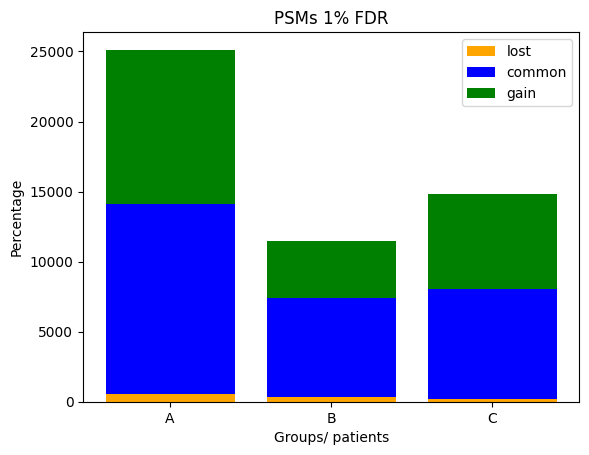

In [74]:
# plot bars in stack manner
plt.bar(x_SA, y1_SA, color='orange')
plt.bar(x_SA, y2_SA, bottom=y1_SA, color='b')
plt.bar(x_SA, y3_SA, bottom=y1_SA+y2_SA, color='g')
######################################################################
plt.bar(x_SH, y1_SH, color='orange')
plt.bar(x_SH, y2_SH, bottom=y1_SH, color='b')
plt.bar(x_SH, y3_SH, bottom=y1_SH+y2_SH, color='g')
######################################################################
plt.bar(x_SBH, y1_SBH, color='orange')
plt.bar(x_SBH, y2_SBH, bottom=y1_SBH, color='b')
plt.bar(x_SBH, y3_SBH, bottom=y1_SBH+y2_SBH, color='g')
######################################################################
plt.xlabel("Groups/ patients")
plt.ylabel("Percentage")
plt.legend(["lost", "common", "gain"])
plt.title("PSMs 1% FDR")
plt.show()